In [1]:
import pandas as pd

In [2]:
def load_data():
    df = pd.read_csv("data/processed/abstencoes_rj.csv", encoding="Latin-1")

    if(df["Unnamed: 0"].empty == False):
        df = df.drop(columns=["Unnamed: 0"])

    zonas = pd.read_csv("data/processed/zonas.csv", encoding="Latin-1")

    if(zonas["Unnamed: 0"].empty == False):
        zonas = zonas.drop(columns=["Unnamed: 0"])
        
    return df, zonas

In [3]:
df, zonas = load_data()

In [4]:
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
0,10/05/2019,17:18:30,2014,1,RJ,58424,SEROPÉDICA,225,0,NÃO INFORMADO,...,75 a 79 anos,2,LÊ E ESCREVE,1,1,0,0,0,0,0
1,10/05/2019,17:18:30,2014,1,RJ,58424,SEROPÉDICA,225,0,NÃO INFORMADO,...,65 a 69 anos,7,SUPERIOR INCOMPLETO,1,1,0,0,0,0,0
2,10/05/2019,17:18:30,2014,1,RJ,58424,SEROPÉDICA,225,0,NÃO INFORMADO,...,80 a 84 anos,1,ANALFABETO,1,0,1,0,0,0,0
3,10/05/2019,17:18:30,2014,1,RJ,58424,SEROPÉDICA,225,0,NÃO INFORMADO,...,70 a 74 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,0,0,0,0
4,10/05/2019,17:18:30,2014,1,RJ,58424,SEROPÉDICA,225,2,MASCULINO,...,50 a 54 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,0,0,0,0


In [5]:
ndf = df.drop(columns=["DT_GERACAO","NR_TURNO","NR_ZONA","HH_GERACAO","CD_MUNICIPIO","CD_GENERO","CD_ESTADO_CIVIL","CD_FAIXA_ETARIA","CD_GRAU_ESCOLARIDADE"])

In [6]:
ndf = ndf.groupby(["ANO_ELEICAO"]).sum()

In [7]:
ndf.head()

,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
ANO_ELEICAO,,,,,,,
2014,24282290,19126317,5155973,54703,26835,11241,1645
2016,20378554,15635871,4742683,50591,31169,5,2
2018,24816680,18903875,5912805,68975,41149,18596,1987
2020,18949299,13192453,5756846,62074,52070,6727,634


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

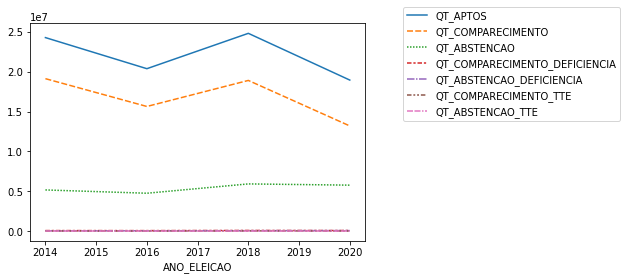

In [19]:
sns.lineplot(data=ndf)

#legend to the right
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)

plt.show()

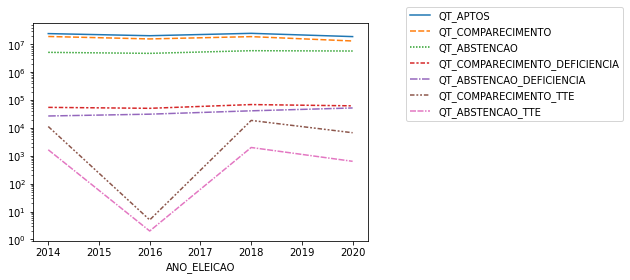

In [20]:
sns.lineplot(data=ndf)

plt.yscale("log")

#legend to the right
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)

plt.show()

In [24]:
ndf.to_csv("data/processed/studies/01_contagens_comparecimentos&abstencoes.csv")

In [8]:
df.shape

(1624804, 23)

In [5]:
df2 = df.merge(zonas,left_on="NR_ZONA", right_on="numero_zona", how="right")

In [6]:
df2.shape

(1304711, 32)

In [7]:
df2.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,QT_ABSTENCAO_TTE,numero_zona,sigla_uf,endereco,cep,bairro,nome_municipio,sigla_uf.1,latitude,longitude
0,10/05/2019,17:18:30,2014,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,0,4,19-0004,"RUA JARDIM BOTÂNICO, 1060",22460000,JARDIM BOTÂNICO,RIO DE JANEIRO,RJ,-22.965846,-43.219059
1,10/05/2019,17:18:30,2014,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,0,4,19-0004,"RUA JARDIM BOTÂNICO, 1060",22460000,JARDIM BOTÂNICO,RIO DE JANEIRO,RJ,-22.965846,-43.219059
2,10/05/2019,17:18:30,2014,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,0,4,19-0004,"RUA JARDIM BOTÂNICO, 1060",22460000,JARDIM BOTÂNICO,RIO DE JANEIRO,RJ,-22.965846,-43.219059
3,10/05/2019,17:18:30,2014,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,0,4,19-0004,"RUA JARDIM BOTÂNICO, 1060",22460000,JARDIM BOTÂNICO,RIO DE JANEIRO,RJ,-22.965846,-43.219059
4,10/05/2019,17:18:30,2014,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,0,4,19-0004,"RUA JARDIM BOTÂNICO, 1060",22460000,JARDIM BOTÂNICO,RIO DE JANEIRO,RJ,-22.965846,-43.219059


In [8]:
df2.to_csv("data/processed/bi.csv", encoding="utf-8")